<a href="https://colab.research.google.com/github/Coreight98/Paran_ajou_Project_Anything/blob/main/nlp_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 7.0MB/s 
     |████████████████████████████████| 92kB 9.4MB/s 
     |████████████████████████████████| 460kB 41.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
! bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-04-07 08:57:40--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c2:513, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=6sJgRdJBE7X6jUsoXcBXrKCAneI%3D&Expires=1617787661&AWSAccessKeyId=AKIA6KO

In [ ]:
cd /content/mecab-ko-dic-2.1.1-20180720

/content/mecab-ko-dic-2.1.1-20180720


In [ ]:
!pip install jamo

In [ ]:
from jamo import h2j, j2hcj 
def get_jongsung_TF(sample_text):
    sample_text_list = list(sample_text) 
    last_word = sample_text_list[-1] 
    last_word_jamo_list = list(j2hcj(h2j(last_word))) 
    last_jamo = last_word_jamo_list[-1] 

    jongsung_TF = "T" 

    if last_jamo in ['ㅏ', 'ㅑ', 'ㅓ', 'ㅕ', 'ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', 'ㅘ', 'ㅚ', 'ㅙ', 'ㅝ', 'ㅞ', 'ㅢ', 'ㅐ,ㅔ', 'ㅟ', 'ㅖ', 'ㅒ']:
        jongsung_TF = "F" 
    return jongsung_TF


In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines() 
    
word_list = ['패브릭소파', '천연/인조가죽소파', '모듈식소파', '풋스툴/쿠션형스툴', '패브릭암체어', '패브릭카우치', 
                      '천연가죽암체어', '천연가죽카우치', '인조가죽암체어', '리클라이너', '라탄암체어', '어린이암체어', '가죽암체어',
                      '더블/퀸/킹침대', '싱글/수퍼싱글+침대', '유아용침대', '간이침대/데이베드', '로프트/2층침대',
                      '소파베드', '디반침대', '여닫이옷장', '어린이옷장', '오픈형옷장', '커피테이블/보조테이블', 
                      '바테이블', '카페테이블', '식탁', '책상/컴퓨터책상', '침대협탁', '콘솔테이블', '화장대', '어린이테이블', 
                      '기저귀교환대', '식탁의자', '바의자', '카페의자','사무용의자', '스툴/벤치', '영아용의자', '스텝스툴/사다리', 
                      '어린이의자', '서랍장', '어린이서랍장', '선반유닛', '수납장', '장식장', '선반/스탠드',
                      '수납가구', '커튼', '블라인드', '샤워커튼', '패널커튼', '암체어', '카우치', '풋', '2층', '디반', '협탁', '간이'] 

for word in word_list: 
    jongsung_TF = get_jongsung_TF(word) 
    
    line = '{},,,,NNP,*,{},{},*,*,*,*,*\n'.format(word, jongsung_TF, word) 
    
    file_data.append(line)

with open("./user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)



In [ ]:
with open("./user-dic/nnp.csv", 'r', encoding='utf-8') as f: 
    file_new = f.readlines() 
file_new

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '패브릭소파,,,,NNP,*,F,패브릭소파,*,*,*,*,*\n',
 '천연/인조가죽소파,,,,NNP,*,F,천연/인조가죽소파,*,*,*,*,*\n',
 '모듈식소파,,,,NNP,*,F,모듈식소파,*,*,*,*,*\n',
 '풋스툴/쿠션형스툴,,,,NNP,*,T,풋스툴/쿠션형스툴,*,*,*,*,*\n',
 '패브릭암체어,,,,NNP,*,F,패브릭암체어,*,*,*,*,*\n',
 '패브릭카우치,,,,NNP,*,F,패브릭카우치,*,*,*,*,*\n',
 '천연가죽암체어,,,,NNP,*,F,천연가죽암체어,*,*,*,*,*\n',
 '천연가죽카우치,,,,NNP,*,F,천연가죽카우치,*,*,*,*,*\n',
 '인조가죽암체어,,,,NNP,*,F,인조가죽암체어,*,*,*,*,*\n',
 '리클라이너,,,,NNP,*,F,리클라이너,*,*,*,*,*\n',
 '라탄암체어,,,,NNP,*,F,라탄암체어,*,*,*,*,*\n',
 '어린이암체어,,,,NNP,*,F,어린이암체어,*,*,*,*,*\n',
 '가죽암체어,,,,NNP,*,F,가죽암체어,*,*,*,*,*\n',
 '더블/퀸/킹침대,,,,NNP,*,T,더블/퀸/킹침대,*,*,*,*,*\n',
 '싱글/수퍼싱글+침대,,,,NNP,*,T,싱글/수퍼싱글+침대,*,*,*,*,*\n',
 '유아용침대,,,,NNP,*,T,유아용침대,*,*,*,*,*\n',
 '간이침대/데이베드,,,,NNP,*,F,간이침대/데이베드,*,*,*,*,*\n',
 '로프트/2층침대,,,,NNP,*,T,로프트/2층침대,*,*,*,*,*\n',
 '소파베드,,,,NNP,*,F,소파베드,*,*,*,*,*\n',
 '디반침대,,,,NNP,*,T,디반침대,*,*,*,*,*\n',
 '여닫이옷장,,,,NNP,*,T,여닫이옷장,*,*,*,*,*\n',
 '어린이옷장,,,,NNP,*,T,어린이옷장,*,*,*,*,*\n',
 '오픈형옷장,,,,NNP,*

In [ ]:
!bash ./tools/add-userdic.sh

generating userdic...
nnp.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/nnp.csv ... 
done!
person.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/person.csv ... 
done!
place.csv
/content/mecab-ko-dic-2.1.1-20180720/tools/../model.def is not a binary model. reopen it as text mode...
reading /content/mecab-ko-dic-2.1.1-20180720/tools/../user-dic/place.csv ... 
done!
test -z "model.bin matrix.bin char.bin sys.dic unk.dic" || rm -f model.bin matrix.bin char.bin sys.dic unk.dic
/usr/local/libexec/mecab/mecab-dict-index -d . -o . -f UTF-8 -t UTF-8
reading ./unk.def ... 13
emitting double-array: 100% |###########################################| 
reading ./EF.csv ... 1820
reading ./Symbol.csv ... 16
reading ./J.csv ... 416
reading ./Group.csv ... 

In [ ]:
!make install

make[1]: Entering directory '/content/mecab-ko-dic-2.1.1-20180720'
make[1]: Nothing to be done for 'install-exec-am'.
 /bin/mkdir -p '/usr/local/lib/mecab/dic/mecab-ko-dic'
 /usr/bin/install -c -m 644 model.bin matrix.bin char.bin sys.dic unk.dic left-id.def right-id.def rewrite.def pos-id.def dicrc '/usr/local/lib/mecab/dic/mecab-ko-dic'
make[1]: Leaving directory '/content/mecab-ko-dic-2.1.1-20180720'


In [ ]:
!pip install Torchtext==0.2.1

     |████████████████████████████████| 51kB 2.5MB/s 
  Found existing installation: torchtext 0.9.1
    Uninstalling torchtext-0.9.1:
      Successfully uninstalled torchtext-0.9.1


In [ ]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding,GRU,LeakyReLU,Activation,Bidirectional,Dropout,SimpleRNN
from keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd
import torchtext
from torchtext.legacy.data import Field
from torchtext.legacy.data import TabularDataset
import codecs
from konlpy.tag import Mecab
from google.colab import drive
%matplotlib inline
import re
import urllib.request

drive.mount('/content/gdrive')
various = ['VA','NNG','NNP']
mecab = Mecab()
train_data = pd.read_table('/content/gdrive/MyDrive/nlp/test2.txt',names=['label','explain'])
x_train = []
# search_token=[]
# for sentence in train_data['explain']:
#   temp_X = mecab.pos(sentence)
#   #print(temp_X)
#   x_train.append(temp_X)
# print(x_train)
# for word in x_train:
#     temp = []
#     for _ in various:
#       if _ in word[1]:
#         temp.append(word[0][0])
#     search_token.append(temp)
# print(np.array(search_token).shape)
# x_train=search_token
# print(x_train)
# tokenizer = Tokenizer()
for sentence in train_data['explain']:
    temp_X = mecab.morphs(sentence) # 토큰화
    x_train.append(temp_X)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2520
등장 빈도가 2번 이하인 희귀 단어의 수: 701
단어 집합에서 희귀 단어의 비율: 27.81746031746032
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.7270615392532365


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1820


In [ ]:
def tokenize(samples):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(samples)
  return tokenizer

In [ ]:
r_src_tokenizer = tokenize(x_train)
x_train = r_src_tokenizer.texts_to_sequences(x_train)

In [ ]:
d = {}
w = set(train_data['label'])
print(len(w))
count = 0
for _ in w:
  d[_]=count
  count+=1
y_train = np.array([d[i] for i in train_data['label']])

33


최대 길이 : 70
평균 길이 : 22.476371447455385


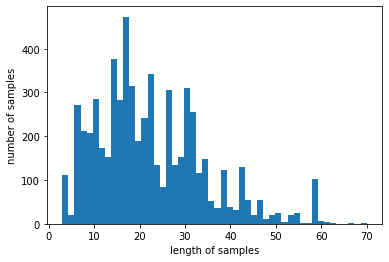

In [ ]:
print('최대 길이 :',max(len(l) for l in x_train))
print('평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

(4841, 60)
(4841, 33)
(1211, 60)
(1211, 33)
Epoch 1/100


1211/1211 [==============================] - ETA: 0s - loss: 3.0682 - acc: 0.1321WARNING:tensorflow:Model was constructed with shape (None, 35) for input KerasTensor(type_spec=TensorSpec(shape=(None, 35), dtype=tf.float32, name='embedding_6_input'), name='embedding_6_input', description="created by layer 'embedding_6_input'"), but it was called on an input with incompatible shape (None, 60).


1211/1211 [==============================] - 49s 38ms/step - loss: 3.0679 - acc: 0.1322 - val_loss: 2.2694 - val_acc: 0.3088

Epoch 00001: val_acc improved from -inf to 0.30884, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 2/100
1211/1211 [==============================] - 45s 37ms/step - loss: 2.0805 - acc: 0.3516 - val_loss: 1.7667 - val_acc: 0.4533

Epoch 00002: val_acc improved from 0.30884 to 0.45334, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 3/100
1211/1211 [==============================] - 46s 38ms/step - loss: 1.6544 - acc: 0.4712 - val_loss: 1.5173 - val_acc: 0.5145

Epoch 00003: val_acc improved from 0.45334 to 0.51445, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 4/100
1211/1211 [==============================] - 46s 38ms/step - loss: 1.4696 - acc: 0.5091 - val_loss: 1.4118 - val_acc: 0.5359

Epoch 00004: val_acc improved from 0.51445 to 0.53592, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 5/100
1211/1211 [==============================] - 46s 38ms/step - loss: 1.3498 - acc: 0.5535 - val_loss: 1.3206 - val_acc: 0.5706

Epoch 00005: val_acc improved from 0.53592 to 0.57060, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 6/100
1211/1211 [==============================] - 46s 38ms/step - loss: 1.2161 - acc: 0.6041 - val_loss: 1.2425 - val_acc: 0.5912

Epoch 00006: val_acc improved from 0.57060 to 0.59125, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 7/100
1211/1211 [==============================] - 46s 38ms/step - loss: 1.1373 - acc: 0.6134 - val_loss: 1.2481 - val_acc: 0.5970

Epoch 00007: val_acc improved from 0.59125 to 0.59703, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 8/100
1211/1211 [==============================] - 46s 38ms/step - loss: 1.0712 - acc: 0.6508 - val_loss: 1.1997 - val_acc: 0.6078

Epoch 00008: val_acc improved from 0.59703 to 0.60776, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 9/100
1211/1211 [==============================] - 46s 38ms/step - loss: 0.9750 - acc: 0.6655 - val_loss: 1.2097 - val_acc: 0.6152

Epoch 00009: val_acc improved from 0.60776 to 0.61519, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 10/100
1211/1211 [==============================] - 45s 38ms/step - loss: 0.9526 - acc: 0.6735 - val_loss: 1.1454 - val_acc: 0.6350

Epoch 00010: val_acc improved from 0.61519 to 0.63501, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 11/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.9267 - acc: 0.6843 - val_loss: 1.1370 - val_acc: 0.6152

Epoch 00011: val_acc did not improve from 0.63501
Epoch 12/100
1211/1211 [==============================] - 45s 38ms/step - loss: 0.8879 - acc: 0.6758 - val_loss: 1.1253 - val_acc: 0.6515

Epoch 00012: val_acc improved from 0.63501 to 0.65153, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 13/100
1211/1211 [==============================] - 45s 38ms/step - loss: 0.8499 - acc: 0.6946 - val_loss: 1.1727 - val_acc: 0.6152

Epoch 00013: val_acc did not improve from 0.65153
Epoch 14/100
1211/1211 [==============================] - 45s 38ms/step - loss: 0.8700 - acc: 0.6950 - val_loss: 1.1205 - val_acc: 0.6515

Epoch 00014: val_acc did not improve from 0.65153
Epoch 15/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.8166 - acc: 0.7103 - val_loss: 1.1138 - val_acc: 0.6449

Epoch 00015: val_acc did not improve from 0.65153
Epoch 16/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.7830 - acc: 0.7212 - val_loss: 1.1490 - val_acc: 0.6375

Epoch 00016: val_acc did not improve from 0.65153
Epoch 17/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.7890 - acc: 0.7176 - val_loss: 1.0962 - val_acc: 0.6565

Epoch 00017: val_acc improved from 0.65153 to 0.65648, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 18/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.7698 - acc: 0.7233 - val_loss: 1.1240 - val_acc: 0.6491

Epoch 00018: val_acc did not improve from 0.65648
Epoch 19/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.7430 - acc: 0.7313 - val_loss: 1.1512 - val_acc: 0.6466

Epoch 00019: val_acc did not improve from 0.65648
Epoch 20/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.7617 - acc: 0.7207 - val_loss: 1.1340 - val_acc: 0.6606

Epoch 00020: val_acc improved from 0.65648 to 0.66061, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 21/100
1211/1211 [==============================] - 45s 37ms/step - loss: 0.7683 - acc: 0.7200 - val_loss: 1.1034 - val_acc: 0.6614

Epoch 00021: val_acc improved from 0.66061 to 0.66144, saving model to anything.NLP


INFO:tensorflow:Assets written to: anything.NLP/assets


INFO:tensorflow:Assets written to: anything.NLP/assets


Epoch 00021: early stopping
38/38 [==============================] - 1s 13ms/step - loss: 1.1034 - acc: 0.6614

 정확도 : 0.6614


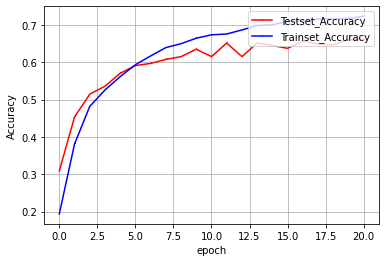

In [ ]:

x_train = sequence.pad_sequences(x_train, maxlen=60)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=.2, random_state=777)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

model = Sequential()
model.add(Embedding(6226, 100, input_length=35))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(100)))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax')) 
# model.add(Embedding(6226, 120)) # 120 차원을 가지는 임베딩 벡터 1000개(단어 집합의 크기)
# model.add(GRU(120,return_sequences=True))
# # # model.add(Dense(128, activation='relu'))
# # # model.add(Dropout(0.2))
# # # model.add(Dense(64, activation='relu'))
# # model.add(Bidirectional(GRU(64)))
# model.add(Dense(33, activation='softmax')) # 33개의 카테고리
# model.add(LeakyReLU())
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # 검증 데이터 손실이 증가하면, 과적합 징후이므로 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# 검증 데이터의 정확도가 이전보다 좋아질 경우에만 모델을 저장(Model Checkpoint)
mc = ModelCheckpoint('anything.NLP', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
# 다중 클래스 분류 문제이므로 손실 함수로 categorical_crossentropy 사용
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=4, epochs=100, callbacks=[es, mc], validation_data=(x_test, y_test))

print("\n 정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

y_test_loss = history.history['val_acc']
y_train_loss = history.history['acc']

x_len = np.arange(len(y_test_loss))

plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_Accuracy')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_Accuracy')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# from datetime import datetime
# history.model.save('/content/gdrive/MyDrive/nlp/ver_'+str(datetime.today()))

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence ] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = 50) # 패딩
  result = (loaded_model.predict_classes(pad_new)) # 예측
  print(list(w)[result[0]],result[0])

In [ ]:
loaded_model = history.model

In [ ]:
sentiment_predict('스툴')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


커피테이블/보조테이블 17
